In [1]:
summary = [{'column': 'Date',
  'properties': {'dtype': 'date',
   'min': '2022-11-21',
   'max': '2023-11-17',
   'num_unique_values': 250,
   'samples': ['2022-11-21', '2022-11-22', '2022-11-23'],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Open',
  'properties': {'dtype': 'number',
   'min': 103.0,
   'max': 296.040009,
   'num_unique_values': 248,
   'samples': [175.850006, 168.630005, 173.570007],
   'semantic_type': '',
   'description': ''}},
 {'column': 'High',
  'properties': {'dtype': 'number',
   'min': 111.75,
   'max': 299.290009,
   'num_unique_values': 246,
   'samples': [176.770004, 170.919998, 183.619995],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Low',
  'properties': {'dtype': 'number',
   'min': 101.809998,
   'max': 289.519989,
   'num_unique_values': 247,
   'samples': [167.539993, 166.190002, 172.5],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Close',
  'properties': {'dtype': 'number',
   'min': 108.099998,
   'max': 293.339996,
   'num_unique_values': 247,
   'samples': [167.869995, 169.910004, 183.199997],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Adj Close',
  'properties': {'dtype': 'number',
   'min': 108.099998,
   'max': 293.339996,
   'num_unique_values': 247,
   'samples': [167.869995, 169.910004, 183.199997],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Volume',
  'properties': {'dtype': 'number',
   'min': 50672700,
   'max': 306590600,
   'num_unique_values': 250,
   'samples': [92882700, 78452300, 109536700],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Daily Range',
  'properties': {'dtype': 'number',
   'min': 2.910004000000015,
   'max': 20.38000500000001,
   'num_unique_values': 240,
   'samples': [9.23001099999999, 4.729996, 11.119994999999989],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Percentage Change',
  'properties': {'dtype': 'number',
   'min': -0.08753273328663176,
   'max': 0.09766988349514556,
   'num_unique_values': 250,
   'samples': [-0.045379645878431296,
    0.007590576777839597,
    0.055481878271745375],
   'semantic_type': '',
   'description': ''}},
 {'column': 'Volume Weighted Average Price',
  'properties': {'dtype': 'number',
   'min': 138.933071859511,
   'max': 203.68287803146123,
   'num_unique_values': 250,
   'samples': [167.869995, 168.80409134966993, 174.41832731024735],
   'semantic_type': '',
   'description': ''}}]

In [2]:
import pandas as pd

df = pd.read_csv("../example/data/Stock_price_TSLA.csv")

In [3]:
questions = [
    {
        "index": 0,
        "question": "How has the opening price of the stock varied over time?",
        "visualization": "line chart with Date on the x-axis and Open on the y-axis",
        "rationale": "This visualization will show the trend of the opening price of the stock over the given time period, allowing us to identify any patterns or changes in the stock's initial trading price."
    },
    {
        "index": 1,
        "question": "What is the average daily range of the stock?",
        "visualization": "bar chart with Daily Range on the x-axis and count of occurrences on the y-axis",
        "rationale": "By visualizing the distribution of the daily range of the stock, we can determine the average magnitude of price fluctuations experienced by the stock on a daily basis."
    },
    {
        "index": 2,
        "question": "How does the volume of stock traded relate to the closing price?",
        "visualization": "scatter plot with Volume on the x-axis and Close on the y-axis",
        "rationale": "Through a scatter plot, we can observe the relationship between the volume of stock traded and the closing price. This can help us determine if there is any correlation between these two variables."
    },
    {
        "index": 3,
        "question": "What is the overall trend of the stock's adjusted closing price over time?",
        "visualization": "line chart with Date on the x-axis and Adj Close on the y-axis",
        "rationale": "Analyzing the adjusted closing price over time allows us to assess the long-term performance and trend of the stock. It provides insights into whether the stock's value has been consistently rising or falling."
    },
    {
        "index": 4,
        "question": "How does the daily volume weighted average price compare to the closing price?",
        "visualization": "bar chart with Date on the x-axis, Volume Weighted Average Price and Close on the y-axis",
        "rationale": "Comparing the daily volume weighted average price and the closing price will give us insights into any discrepancies or deviations between the two. This can help identify whether the majority of trading activity is happening at the closing price or if there are significant differences due to intraday price fluctuations."
    }
]


In [4]:
system_prompt = """
You are a helpful assistant highly skilled in writing PERFECT code for visualizations. Given some code template, 
you complete the template to generate a visualization given the dataset and the goal described. The code you write 
MUST FOLLOW VISUALIZATION BEST PRACTICES ie. meet the specified goal, apply the right transformation, use the right 
visualization type, use the right data encoding, and use the right aesthetics (e.g., ensure axis are legible). 
The transformations you apply MUST be correct and the fields you use MUST be correct. The visualization CODE MUST BE 
CORRECT and MUST NOT CONTAIN ANY SYNTAX OR LOGIC ERRORS (e.g., it must consider the field types and use them correctly).
You MUST first generate a brief plan for how you would solve the task e.g. what transformations you would apply e.g.
if you need to construct a new column, what fields you would use, what visualization type you would use, what aesthetics you would use, etc.
"""



In [5]:
question = questions[0]['question']
visualization = questions[0]['visualization']


In [6]:
general_instructions = f"If the solution requires a single value (e.g. max, min, median, first, last etc), ALWAYS add a line (axvline or axhline) to the chart, ALWAYS with a legend containing the single value (formatted with 0.2F). If using a <field> where semantic_type=date, YOU MUST APPLY the following transform before using that column i) convert date fields to date types using data[''] = pd.to_datetime(data[<field>], errors='coerce'), ALWAYS use  errors='coerce' ii) drop the rows with NaT values data = data[pd.notna(data[<field>])] iii) convert field to right time format for plotting.  ALWAYS make sure the x-axis labels are legible (e.g., rotate when needed). Solve the task  carefully by completing ONLY the <imports> AND <stub> section. Given the dataset summary, the plot(data) method should generate a seaborn chart ({visualization}) that addresses this goal: {question}. DO NOT WRITE ANY CODE TO LOAD THE DATA. The data is already loaded and available in the variable data."

matplotlib_instructions = f" {general_instructions} DO NOT include plt.show(). The plot method must return a matplotlib object (plt). Think step by step. USE 'df' to represent the dataframe.\n"

instructions = {
            "role": "assistant",
            "content": f"{matplotlib_instructions}. Use BaseMap for charts that require a map. "}


template = \
                f"""
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
<imports>
# solution plan
# i.  ..
def plot(df: pd.DataFrame):

    <stub> # only modify this section
    plt.title('{question}', wrap=True)
    return plt;

chart = plot(df) # data already contains the data to be plotted. Always include this line. No additional code beyond this line."""



In [7]:
## Get API from 'apikey' file
filename = '../apikey'
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)
api_key = get_file_contents(filename)
# print("Your API key is: %s" % (api_key))

from openai import OpenAI

client = OpenAI(
  api_key= api_key
)

In [8]:
messages = [
            {"role": "system", "content": system_prompt},
            {"role": "system", "content": f"The dataset summary is : {summary} \n\n"},
            instructions,
            {"role": "user",
             "content":
             f"Always add a legend with various colors where appropriate. The visualization code MUST only use data fields that exist in the dataset (field_names) or fields that are transformations based on existing field_names). Only use variables that have been defined in the code or are in the dataset summary. You MUST return a FULL PYTHON PROGRAM ENCLOSED IN BACKTICKS ``` that starts with an import statement. DO NOT add any explanation. \n\n THE GENERATED CODE SOLUTION SHOULD BE CREATED BY MODIFYING THE SPECIFIED PARTS OF THE TEMPLATE BELOW \n\n {template} \n\n.The FINAL COMPLETED CODE BASED ON THE TEMPLATE above is ... \n\nBe aware of the following error, i.e. ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead."}]

completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages = messages,
    )

  # return(completion.choices[0].message.content)
response = completion


In [9]:
code = completion.choices[0].message.content
print(code)

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(df: pd.DataFrame):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Open', data=df)
    plt.title('How has the opening price of the stock varied over time?', wrap=True)
    plt.xticks(rotation=45)
    return plt

chart = plot(df)
```


In [11]:
import re

def preprocess_code(code: str) -> str:
    """Preprocess code to remove any preamble and explanation text"""

    code = code.replace("<imports>", "")
    code = code.replace("<stub>", "")
    code = code.replace("<transforms>", "")

    # remove all text after chart = plot(data)
    if "chart = plot(data)" in code:
        # print(code)
        index = code.find("chart = plot(data)")
        if index != -1:
            code = code[: index + len("chart = plot(data)")]

    if "```" in code:
        pattern = r"```(?:\w+\n)?([\s\S]+?)```"
        matches = re.findall(pattern, code)
        if matches:
            code = matches[0]
        # code = code.replace("```", "")
        # return code

    if "import" in code:
        # return only text after the first import statement
        index = code.find("import")
        if index != -1:
            code = code[index:]

    code = code.replace("```", "")
    if "chart = plot(data)" not in code:
        code = code + "\nchart = plot(data)"
    return code

In [12]:
code = preprocess_code(code)
print(code)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(df: pd.DataFrame):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Open', data=df)
    plt.title('How has the opening price of the stock varied over time?', wrap=True)
    plt.xticks(rotation=45)
    return plt

chart = plot(df)

chart = plot(data)


In [13]:
code

"import seaborn as sns\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\ndef plot(df: pd.DataFrame):\n    plt.figure(figsize=(12, 6))\n    sns.lineplot(x='Date', y='Open', data=df)\n    plt.title('How has the opening price of the stock varied over time?', wrap=True)\n    plt.xticks(rotation=45)\n    return plt\n\nchart = plot(df)\n\nchart = plot(data)"

An error occurred: name 'data' is not defined


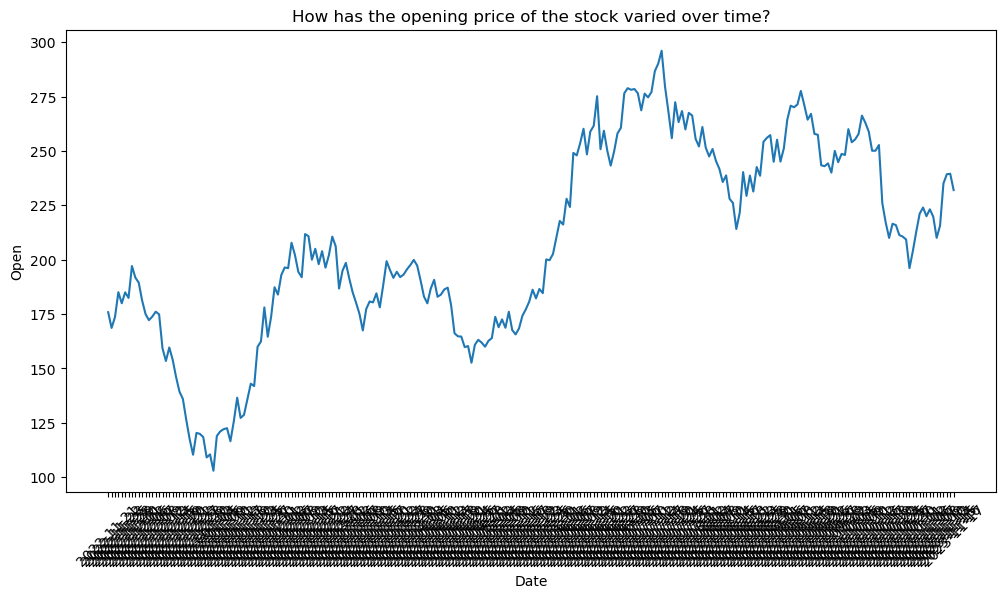

In [14]:
try:
    exec(code)
except Exception as e:
    print(f"An error occurred: {e}")

## Error

In [37]:
new_message = {"role": "user", "content": "Encounter Error: ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead."}
messages.append(new_message)

# Make another call to the GPT-3.5 Turbo model
completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages,
)

# Update the 'response' variable with the new completion
response = completion

In [12]:
print(completion.choices[0].message.content)

The error you encountered suggests that there is an issue with multi-dimensional indexing. To fix this, you can try converting the object to a NumPy array before indexing. Here is an updated version of the code that addresses this issue:

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):
    sns.lineplot(x="Date", y="Open", data=data)
    plt.title('How has the opening price of the stock varied over time?', wrap=True)
    return plt

chart = plot(data)
```

Please replace the `<imports>` and `<stub>` sections with this code. This should resolve the ValueError and generate a line chart showing the variation of the opening price over time.


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

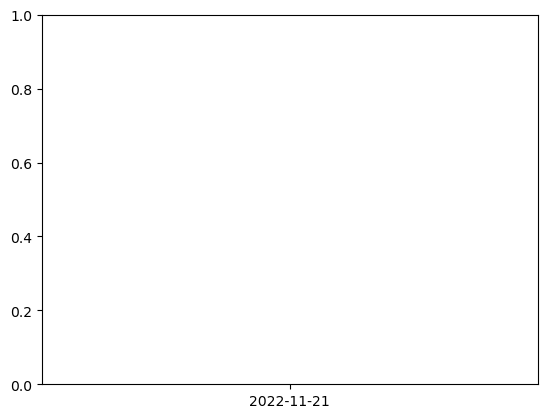

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):
    sns.lineplot(x="Date", y="Open", data=data)
    plt.title('How has the opening price of the stock varied over time?', wrap=True)
    return plt

chart = plot(df)

In [25]:
!pip install seaborn

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

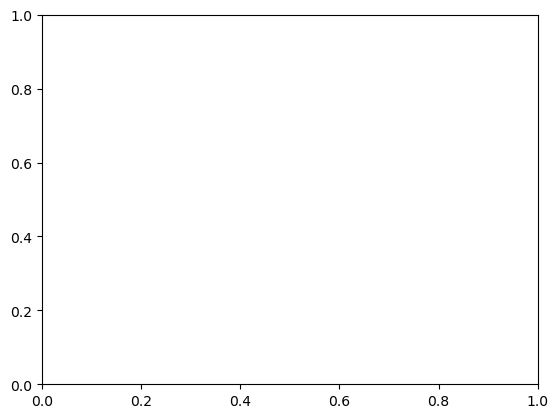

In [26]:
flights = sns.load_dataset("flights")
flights.head()

may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [20]:
flights.head()
flights['year']

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: year, Length: 144, dtype: int64

## Old version

In [24]:
system_prompt = """
You are a helpful assistant highly skilled in writing PERFECT code for visualizations. You can generate a visualization given the dataset summary and the goal described. 
i) MUST not change any columns value for any visulization
ii) The visualization CODE MUST BE CORRECT and MUST NOT CONTAIN ANY SYNTAX OR LOGIC ERRORS (e.g., it must consider the field types and use them correctly). 
iii) USE matplotlib.pyplot visualization library
iv) Dataframe df is provide for you
"""

In [25]:
user_prompt = f"""
QUESTION: {questions[0]['question']}

TARGETED VISUALIZATION: {questions[0]['visualization']}

RATIONALE: {questions[0]['rationale']}

The data summary is as follows,
{summary}


USE the QUESTION as the plot title
ONLY return Executable Python code, nothing else
USE "df" to represent the dataframe in the code
Code must not require further input
USE matplotlib.pyplot and seaborn visualization library


"""

In [26]:
## Get API from 'apikey' file
filename = '../apikey'
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)
api_key = get_file_contents(filename)
# print("Your API key is: %s" % (api_key))

from openai import OpenAI

client = OpenAI(
  api_key= api_key
)

In [27]:
def gpt_conversation(system_prompt, user_prompt):

  completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages = [
      {"role": "system", "content": system_prompt},
      {"role": "assistant",
          "content":
          user_prompt}]
    )

  return(completion.choices[0].message.content)

In [28]:
code = gpt_conversation(system_prompt, user_prompt)


In [29]:
code

'```python\nimport matplotlib.pyplot as plt\n\n# Set the figure size\nplt.figure(figsize=(10, 6))\n\n# Create a line plot using "Date" as x-axis and "Open" as y-axis\nplt.plot(df[\'Date\'], df[\'Open\'])\n\n# Set the title of the plot\nplt.title(\'How has the opening price of the stock varied over time?\')\n\n# Set the labels for x-axis and y-axis\nplt.xlabel(\'Date\')\nplt.ylabel(\'Open\')\n\n# Rotate the x-axis labels for better visibility\nplt.xticks(rotation=45)\n\n# Show the plot\nplt.show()\n```'

In [30]:
def execute(n, system_prompt, user_prompt):

    completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages = [
      {"role": "system", "content": system_prompt},
      {"role": "assistant",
          "content":
          user_prompt}]
    )

    code = completion.choices[0].message.content

    print(code)


    if n > 2:
        return "Sorry! It is impossible to execute."

    try:
        exec(code)

    except Exception as exception_error:

        error = exception_error

        print(error)

        user_prompt=f"""
        
        Attempt {n} code: {code}
        Attempt {n} ERROR: {error}

        """

        n += 1
        execute(n, system_prompt, user_prompt)


In [31]:
execute(1, system_prompt, user_prompt)

Here is the code for generating a line chart of the opening price of the stock over time using matplotlib.pyplot:

```python
import matplotlib.pyplot as plt

# Create a line chart
plt.plot(df['Date'], df['Open'])

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Open Price')

# Set the title
plt.title('How has the opening price of the stock varied over time?')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()
```

This code will create a line chart with the Date on the x-axis and the Open price on the y-axis. The chart's title will be "How has the opening price of the stock varied over time?" and the x-axis labels will be rotated for better visibility.
unterminated string literal (detected at line 25) (<string>, line 25)
Apologies for the syntax error in the code. Below is the corrected code:

```python
import matplotlib.pyplot as plt

# Create a line chart
plt.plot(df['Date'], df['Open'])

# Set the x

In [ ]:
completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages = [
    {"role": "system", "content": system_prompt},
    {"role": "assistant",
        "content":
        user_prompt}]
  )

print(completion.choices[0].message.content)